# Projeto 2 - Ciência dos Dados 

nome: Nicolas Byung Kwan Cho

O objetivo deste projeto é responder a pergunta: Com base nos dados de pluviosidade e temperatura na região de Campinas, como prever o número de casos de dengue?

O dataset escolhido possui informações do número de caos confirmados de dengue na região de Campinas, assim como dados de chuva e temperaturas em determinada data (de 1998 a 2014)

Com o dataset abaixo é fácil ver que nossa variável target apresenta-se na coluna de 'casos confirmados', sendo as outras colunas as features.

### Leitura do dataset

In [517]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [518]:
#leitura do dataset
dados = pd.read_csv('dengue-dataset.csv')

In [519]:
dados.head()

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9


Das colunas acima, chuva é medida em mm e os dados de temperatura em graus celsius

Como em algumas datas não foram relatados os níveis de chuva, as linhas afetadas não participarão da análise, assim como as colunas de data e temperaturas máximas e mínimas que serão consideradas irrelevantes para os casos confirmados. Valores fora da curva também foram desconsiderados (outliers)

In [520]:
limite = 2000
dados_filtrados = dados[(dados["casos-confirmados"] < limite) ]

dados_filtrados.dropna(subset = ['chuva'], inplace=True)
dados_filtrados.drop('data',inplace=True, axis=1) ###
dados_filtrados.drop('temperatura-mininima',inplace=True, axis=1)
dados_filtrados.drop('temperatura-maxima',inplace=True, axis=1)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [521]:
dados_filtrados.head()

,casos-confirmados,chuva,temperatura-media
0,237,179.2,25.7
1,331,226.3,25.1
2,562,149.1,24.8
3,187,46.4,22.7
4,32,88.3,19.2


## Análise exploratória

Analisando as medidas de cada variavel:

In [522]:
#Para os casos confirmados
print('Medidas a respeito do número de casos confirmados:')
dados_filtrados['casos-confirmados'].describe()

Medidas a respeito do número de casos confirmados:


count     189.000000
mean      115.783069
std       274.971044
min         0.000000
25%         6.000000
50%        17.000000
75%        72.000000
max      1853.000000
Name: casos-confirmados, dtype: float64

In [523]:
#Para os dados da chuva
print('Medidas a respeito da chuva:')
dados_filtrados['chuva'].describe()

Medidas a respeito da chuva:


count    189.000000
mean     117.640741
std       97.824704
min        0.800000
25%       43.100000
50%       86.000000
75%      179.200000
max      452.800000
Name: chuva, dtype: float64

In [524]:
#Para os dados de temperatura
print('Medidas a respeito da temperatura:')
dados_filtrados['temperatura-media'].describe()

Medidas a respeito da temperatura:


count    189.000000
mean      22.277778
std        2.411637
min       16.400000
25%       20.200000
50%       22.800000
75%       24.300000
max       27.200000
Name: temperatura-media, dtype: float64

Devemos então analisar como a variável target se comporta em relação as suas features

#### Casos x Chuva

In [525]:
#COVARIÂNCIA
cov_chuva = dados_filtrados['casos-confirmados'].cov(dados_filtrados['chuva'])
print('Covariância entre número de casos e volume de chuva:', cov_chuva)

Covariância entre número de casos e volume de chuva: -2953.988987391648


In [526]:
#CORRELAÇÃO
corr_chuva = dados_filtrados['casos-confirmados'].corr(dados_filtrados['chuva'])
print('Correlação entre número de casos e volume de chuva:', corr_chuva)

Correlação entre número de casos e volume de chuva: -0.10981795914378017


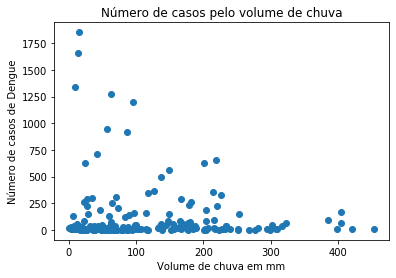

In [527]:
#HISTOGRAMA
plt.scatter(dados_filtrados['chuva'], dados_filtrados['casos-confirmados'])
plt.title('Número de casos pelo volume de chuva')
plt.xlabel('Volume de chuva em mm')
plt.ylabel('Número de casos de Dengue')
plt.show()

Analisando as duas variáveis no tempo

In [528]:
x = []
for i in range(0,len(dados_filtrados['chuva'])):
    x.append(i)

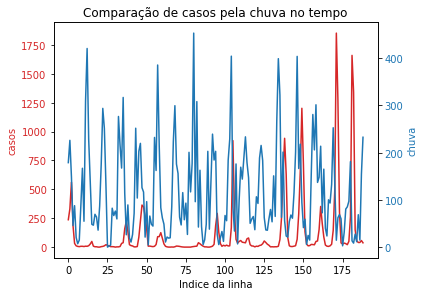

In [529]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Indice da linha')
ax1.set_ylabel('casos', color='tab:red')
ax1.plot(x, dados_filtrados['casos-confirmados'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('chuva', color='tab:blue') 
ax2.plot(x, dados_filtrados['chuva'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.title('Comparação de casos pela chuva no tempo')
plt.show()

Dos dados acima percebe-se que o indice de correlação entre as variáveis é baixo. Mas ao analisar no gráfico, é possível identificar um atraso no número de casos em relação a chuva. Ou seja, após períodos de muita chuva há um intervalo de tempo até que o número de casos aumente. Isso pode ter acontecido, pois o ciclo de reprodução do Aedes aegypti não é instantâneo, levando um tempo até que nascam novos vetores. Além disso, pode-se considerar o tempo detecção da doença que não é imediata. Logo é proposto um 'delay' na variável de casos.

In [530]:
dados_filtrados_delay_casos = dados_filtrados.copy()
dados_filtrados_delay_casos['casos-confirmados'] = dados_filtrados_delay_casos['casos-confirmados'].shift(-2)

dados_filtrados.dropna(subset = ['casos-confirmados'], inplace=True)
dados_filtrados.head()


C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,casos-confirmados,chuva,temperatura-media
0,237,179.2,25.7
1,331,226.3,25.1
2,562,149.1,24.8
3,187,46.4,22.7
4,32,88.3,19.2


In [531]:
#NOVA COVARIANCIA
nova_cov_chuva = dados_filtrados_delay_casos['casos-confirmados'].cov(dados_filtrados_delay_casos['chuva'])
print('Nova covariância entre número de casos e volume de chuva:', nova_cov_chuva)

Nova covariância entre número de casos e volume de chuva: 7424.509024782934


In [532]:
# NOVA CORRELAÇÃO
nova_corr_chuva = dados_filtrados_delay_casos['casos-confirmados'].corr(dados_filtrados_delay_casos['chuva'])
print('Nova correlação entre número de casos e volume de chuva:', nova_corr_chuva)

Nova correlação entre número de casos e volume de chuva: 0.2748022673148059


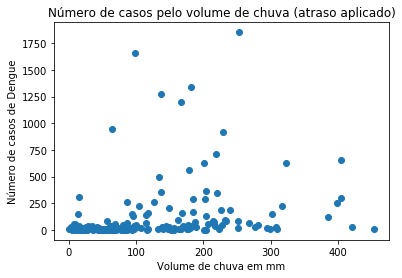

In [533]:
# NOVO HISTOGRAMA
plt.scatter(dados_filtrados_delay_casos['chuva'], dados_filtrados_delay_casos['casos-confirmados'])
plt.title('Número de casos pelo volume de chuva (atraso aplicado)')
plt.xlabel('Volume de chuva em mm')
plt.ylabel('Número de casos de Dengue')
plt.show()

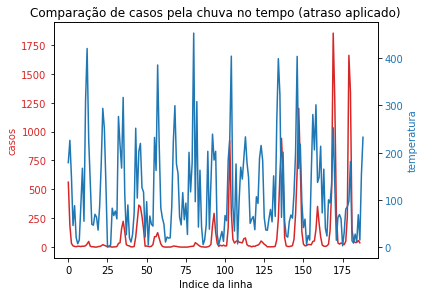

In [534]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Indice da linha')
ax1.set_ylabel('casos', color='tab:red')
ax1.plot(x, dados_filtrados_delay_casos['casos-confirmados'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('temperatura', color='tab:blue')  
ax2.plot(x, dados_filtrados_delay_casos['chuva'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.title('Comparação de casos pela chuva no tempo (atraso aplicado)')
plt.show()

#### Casos x Temperatura

In [535]:
#COVARIANCIA
cov_temp = dados_filtrados['casos-confirmados'].cov(dados_filtrados['temperatura-media'])
print('Covariância entre número de casos e temperatura media:', cov_temp)

Covariância entre número de casos e temperatura media: 62.89781323877069


In [536]:
#CORRELAÇÃO
corr_temp = dados_filtrados['casos-confirmados'].corr(dados_filtrados['temperatura-media'])
print('Correlação entre número de casos e temperatura media:', corr_temp)

Correlação entre número de casos e temperatura media: 0.09484985033586252


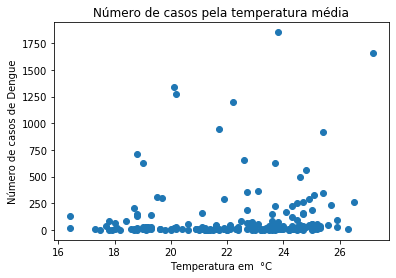

In [537]:
#HISTOGRAMA
plt.scatter(dados_filtrados['temperatura-media'], dados_filtrados['casos-confirmados'])
plt.title('Número de casos pela temperatura média')
plt.xlabel('Temperatura em  °C')
plt.ylabel('Número de casos de Dengue')
plt.show()

Analisando as duas variáveis no tempo

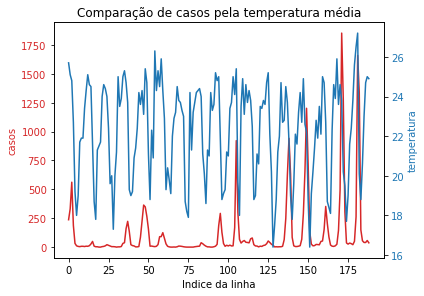

In [538]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Indice da linha')
ax1.set_ylabel('casos', color='tab:red')
ax1.plot(x, dados_filtrados['casos-confirmados'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('temperatura', color='tab:blue')
ax2.plot(x, dados_filtrados['temperatura-media'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.title('Comparação de casos pela temperatura média')
plt.show()

Assim como foi feito com a variável da chuva, o mesmo 'delay' será considerado com a temperatura média

In [539]:
#NOVA COVARIANCIA
nova_cov_temp = dados_filtrados_delay_casos['casos-confirmados'].cov(dados_filtrados_delay_casos['temperatura-media'])
print('Nova covariância entre número de casos e temperatura media:', nova_cov_temp)

Nova covariância entre número de casos e temperatura media: 229.28573975044563


In [540]:
# NOVA CORRELAÇÃO
nova_corr_temp = dados_filtrados_delay_casos['casos-confirmados'].corr(dados_filtrados_delay_casos['temperatura-media'])
print('Nova correlação entre número de casos e temperatura media:', nova_corr_temp)

Nova correlação entre número de casos e temperatura media: 0.34511456009174424


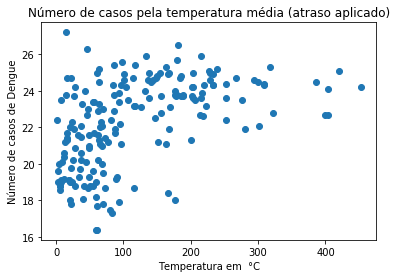

In [541]:
# NOVO HISTOGRAMA
plt.scatter(dados_filtrados_delay_casos['chuva'], dados_filtrados_delay_casos['temperatura-media'])
plt.title('Número de casos pela temperatura média (atraso aplicado)')
plt.xlabel('Temperatura em  °C')
plt.ylabel('Número de casos de Dengue')
plt.show()

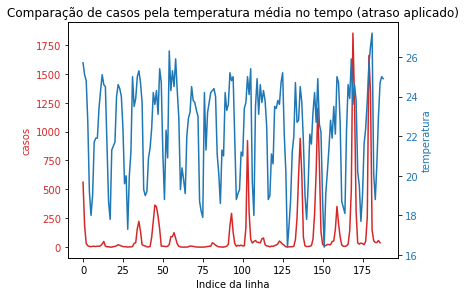

In [542]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Indice da linha')
ax1.set_ylabel('casos', color='tab:red')
ax1.plot(x, dados_filtrados_delay_casos['casos-confirmados'], color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('temperatura', color='tab:blue')  
ax2.plot(x, dados_filtrados_delay_casos['temperatura-media'], color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout() 
plt.title('Comparação de casos pela temperatura média no tempo (atraso aplicado)')
plt.show()